<SkyCoord (ICRS): (ra, dec) in deg
    (266.58818356, -28.59536026)>
(array(175.), array(166.))


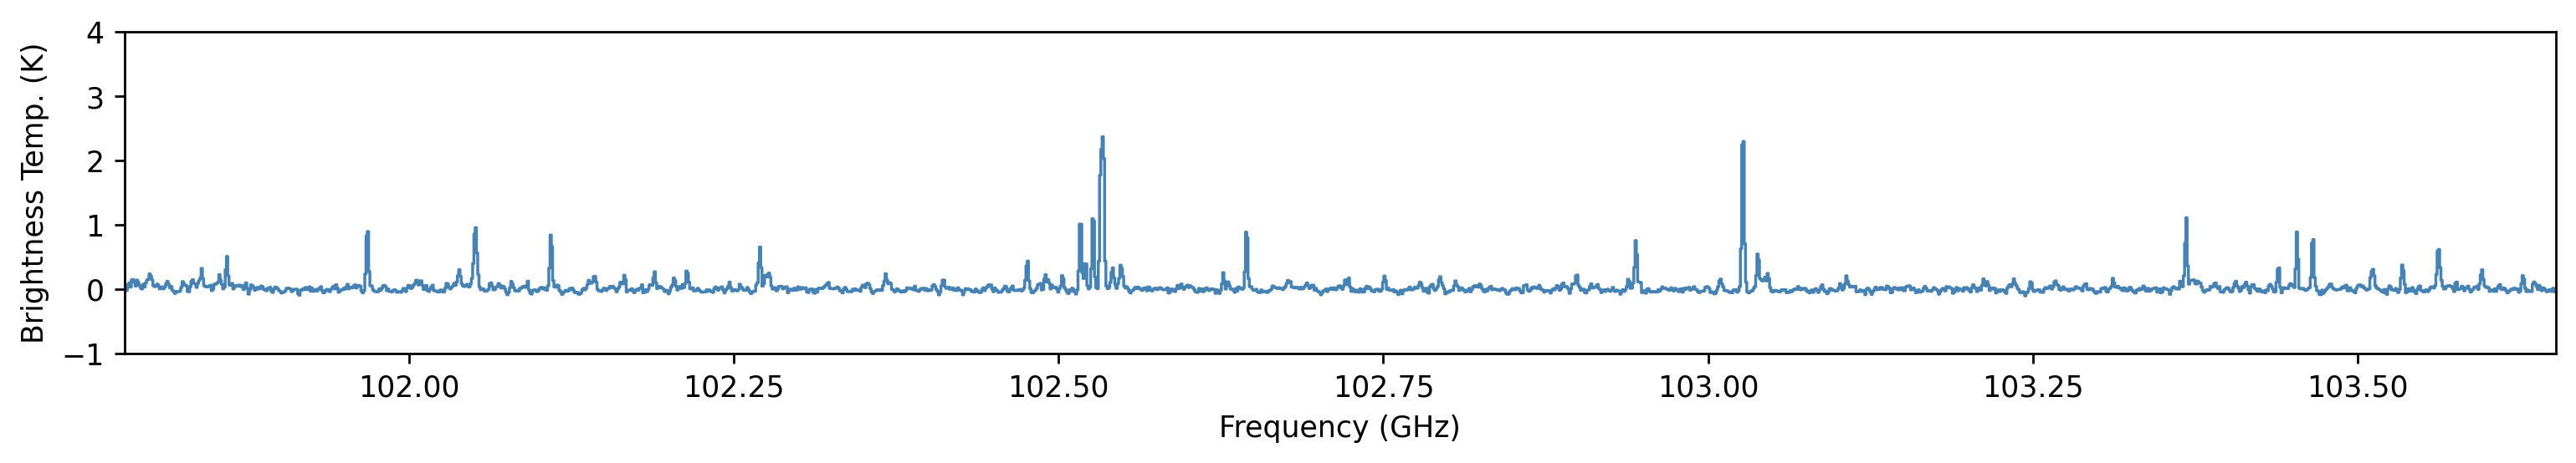

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube
import pyspeckit
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=w1.pixel_to_world(175,166)
print(core_coords)


#########

#reads in file
path="B.Dust_Ridge_sci.spw31.cube.I.pbcor.fits"
#makes figure
fig1=pylab.figure(1,figsize=(15,2),dpi=250)



#find the corresponding pixel positions for those coords in new image
header=fits.getheader(path)
w2=WCS(header)
image_coords=core_coords.to_pixel(w2,0,mode="wcs")
print(image_coords)

#plots spectrum
sc=SpectralCube.read(path)
sc.allow_huge_operations=True 
sc_Ghz=sc.with_spectral_unit(u.GHz)
sc_Ghz=sc_Ghz.to(u.K)
freq,Dec,Ra = sc_Ghz.world[:,0,0] 
subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
spectrum = np.average(subcube,axis=(1,2)) 
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=10)
    
pylab.ylabel('Brightness Temp. (K)',fontsize=10)
pylab.ylim(-1,4)


plt.rcParams['text.usetex'] = True

#three_sigma=3*np.std(spectrum[0:275])
#3 sigma 
#pylab.hlines(three_sigma,freq[0].value,freq[1916].value,colors="red",label =r'$3 \sigma$',ls="--" )

pylab.xlim(freq[0].value,freq[1916].value)
#ax1.fill_between(freq.value,three_sigma, -2, alpha = 0.2, color= 'red' )

#pylab.vlines(115.256,-2,7,colors="green",label=r"${}^{12}C^{16}O$",lw=2)

#plt.legend(fontsize=14,loc="upper left")
#plt.title()
plt.savefig("B.spw31.pdf")
